Task 1: Movie Genre Classification

We are creating machine learning model that can predict the genre of the mocie based on its plt summary or other textual information. 
We are going to use technique TF-IDF with Naive Bayes classifier

Methodology:
    1. Data Collection
    2. Data Cleaning and preprocessing
    3. Data Visualization
    4. Feature Engineering
    5. Model Selection & Training
    6. Make Prediction of Test data

In [1]:
# Importing Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
import nltk
import os

# Set the custom download path for NLTK data
custom_download_path = 'C:/Users/sujal/CodSoft/working'

# Make sure the directory exists; if not, create it
os.makedirs(custom_download_path, exist_ok=True)

# Append the custom download path to NLTK data path
nltk.data.path.append(custom_download_path)

# Download NLTK resources to the custom path
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sujal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sujal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#Load dataset
#Data Collection
train_path = "C:/Users/sujal/CodSoft/MovieGenreClassification/archive/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, names=["id",'Title', "Genre", "Description"], sep=":::", engine='python')
#train_data1 = np.array(train_data)
test_path = "C:/Users/sujal/CodSoft/MovieGenreClassification/archive/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path, names=["id","Genre", "Description"], sep=":::", engine='python')
test_data_solution = pd.read_csv("C:/Users/sujal/CodSoft/MovieGenreClassification/archive/Genre Classification Dataset/test_data_solution.txt",
                     names=["id", "Title", "Genre", "Description"], sep= ":::", engine= "python")

In [4]:
#train_data1.head()
len(train_data)

54214

In [5]:
test_data.head()

,id,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [6]:
test_data_solution.head()

,id,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [7]:
print(train_data.isnull().sum())


id             0
Title          0
Genre          0
Description    0
dtype: int64


In [8]:
#data cleaning and preprocessing

#initialize stemmer and stopwords
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

#function to preprocess the data
def preprocessing(text):
    text = text.lower()   #converting into lowercase
    text = re.sub(r'@\S+','',text)   #remove twitter handles
    text = re.sub(r'http\S+','', text) # remove url
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text
                     
                     

In [9]:
train_data["Text_Cleaning"] = train_data["Description"].apply(preprocessing)
test_data["Text_Cleaning"] = test_data["Description"].apply(preprocessing)

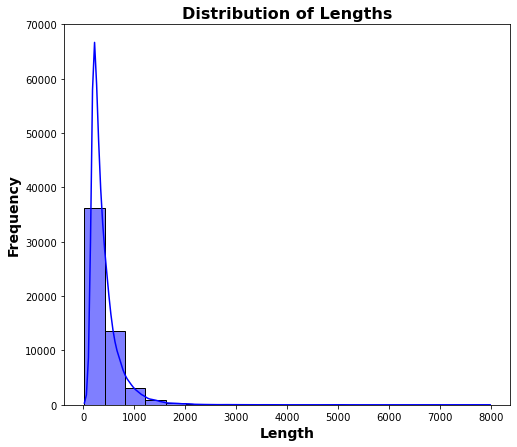

In [10]:
# Calculate the length of cleaned text
train_data['length_Text_Cleaning'] = train_data['Text_Cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_Cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

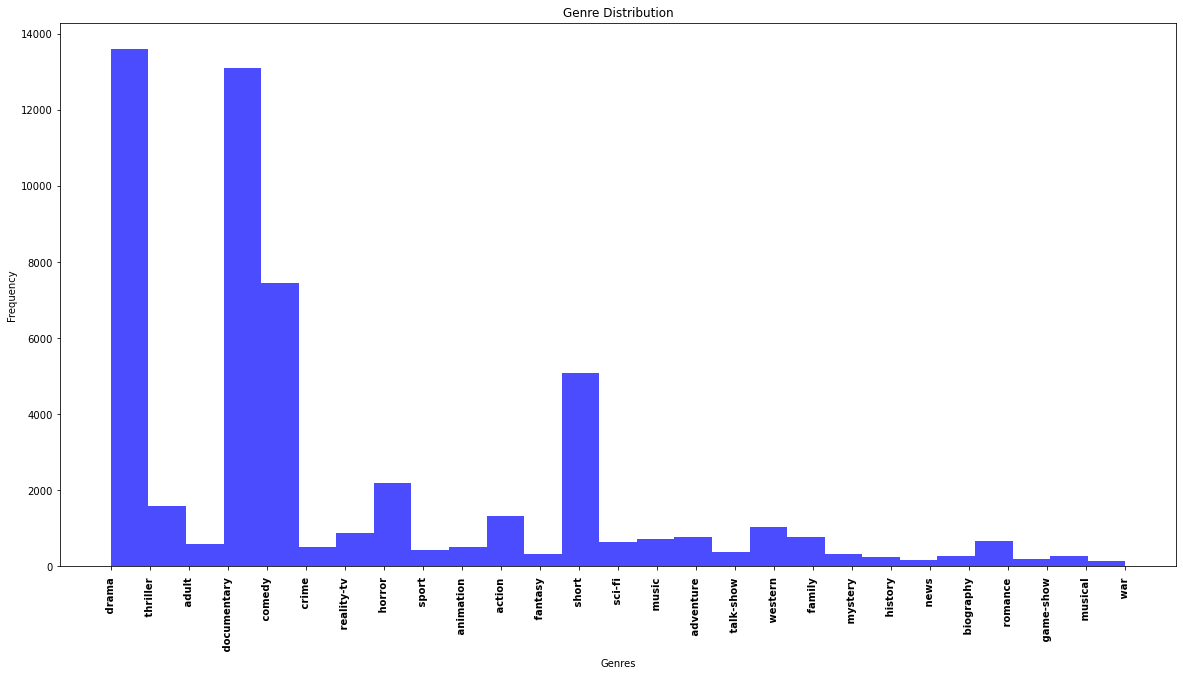

In [11]:
#histogram
plt.figure(figsize = (20,10))
plt.hist(train_data["Genre"], bins=27, color="blue", alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90, fontweight= "bold")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

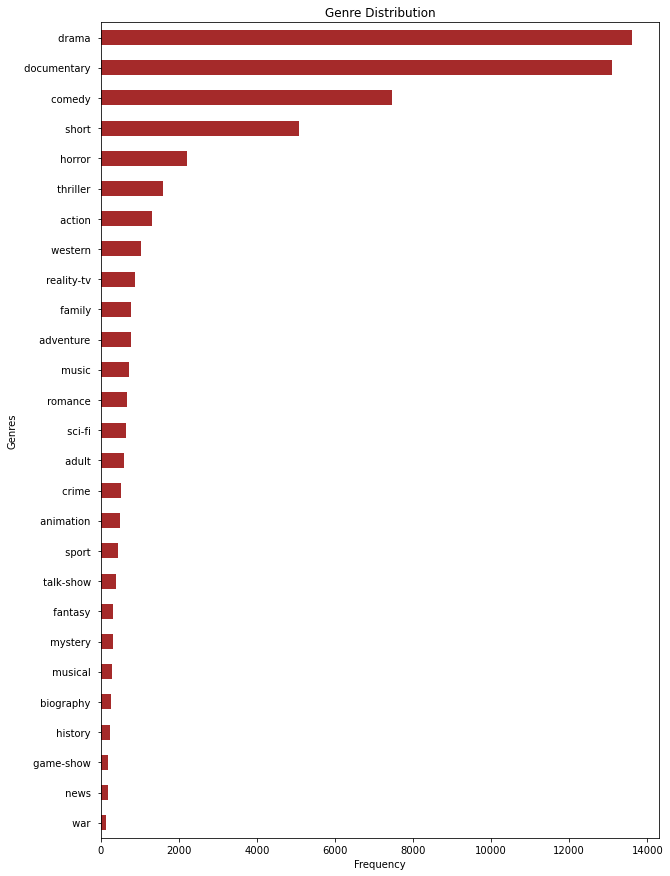

In [12]:
#bargraph
genre_counts = train_data["Genre"].value_counts()
sorted_genres = genre_counts.sort_values(ascending= True)
plt.figure(figsize= (10, 15))
sorted_genres.plot(kind= "barh", color= "brown", alpha= 1)
plt.title("Genre Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genres")
plt.show

In [13]:
#visualize word counts
'''genres = train_data["Genre"].unique()
plt.figure(figsize= (20, 60))

for i, genre in enumerate(genres, 1):
    plt.subplot(14, 2, i)
    text_subset = " ".join(list(train_data[train_data["Genre"] == genre]["Description"]))
    wordcloud = WordCloud(max_words=300, width=300, height=100, background_color="white").generate(text_subset)
    plt.imshow(wordcloud, interpolation= "bilinear")
    plt.title(f'wordcloud for {genre} Genre', fontsize=30)
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()'''

'genres = train_data["Genre"].unique()\nplt.figure(figsize= (20, 60))\n\nfor i, genre in enumerate(genres, 1):\n    plt.subplot(14, 2, i)\n    text_subset = " ".join(list(train_data[train_data["Genre"] == genre]["Description"]))\n    wordcloud = WordCloud(max_words=300, width=300, height=100, background_color="white").generate(text_subset)\n    plt.imshow(wordcloud, interpolation= "bilinear")\n    plt.title(f\'wordcloud for {genre} Genre\', fontsize=30)\n    plt.axis("off")\n    \n    plt.tight_layout()\n    plt.show()'

In [14]:
#Feature Engineering

data = train_data.drop(['Title','id'],axis=1)
data.head()

,Genre,Description,Text_Cleaning,length_Text_Cleaning
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...,383
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,119
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,402
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,745
4,drama,The film's title refers not only to the un-re...,films title refers un recovered bodies ground ...,405


In [15]:
#model selection and training

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data["Genre"])
data["Genre_encoded"]
class_names = list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [16]:
data.head()

,Genre,Description,Text_Cleaning,length_Text_Cleaning,Genre_encoded
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...,383,8
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,119,24
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,402,1
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,745,8
4,drama,The film's title refers not only to the un-re...,films title refers un recovered bodies ground ...,405,8


In [17]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_Cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_Cleaning'])

In [18]:
#split the data to train & test
x = X_train
y = data["Genre"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [19]:
#multinomialNB with TfidfVectorizer
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
print("Model score on training data", mnb.score(x_train,y_train))
#print("Model score on test data", mnb.score(X_test, y_test))
y_pred = mnb.predict(x_test)
print(classification_report(y_pred, y_test))
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy", accuracy)

Model score on training data 0.4661179128911023
               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.04      0.69      0.08        89
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.54      0.68      4453
       drama        0.88      0.38      0.53      6301
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery    

C:\Users\sujal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sujal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sujal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#make prediction on test data
X_test_prediction = mnb.predict(X_test)
test_data["Prediction_Genre"] = X_test_prediction


In [21]:
test_data.to_csv("Prediction_Genre.csv", index = False)
print(test_data)

          id                             Genre  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    

Done